<a href="https://colab.research.google.com/github/instrutordanilo/KmeansTitanic/blob/main/K_Means_com_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importando as bibliotecas que precisamos

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from collections import Counter
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Dados Originais:
   Pclass  Sexo  Idade  SibSp  Parch   Tarifa  PortoEmbarque
0       3     1   22.0      1      0   7.2500              2
1       1     0   38.0      1      0  71.2833              0
2       3     0   26.0      0      0   7.9250              2
3       1     0   35.0      1      0  53.1000              2
4       3     1   35.0      0      0   8.0500              2

Dados Normalizados:
     Pclass      Sexo     Idade     SibSp     Parch    Tarifa  PortoEmbarque
0  0.827377  0.737695 -0.565736  0.432793 -0.473674 -0.502445       0.585954
1 -1.566107 -1.355574  0.663861  0.432793 -0.473674  0.786845      -1.942303
2  0.827377 -1.355574 -0.258337 -0.474545 -0.473674 -0.488854       0.585954
3 -1.566107 -1.355574  0.433312  0.432793 -0.473674  0.420730       0.585954
4  0.827377  0.737695  0.433312 -0.474545 -0.473674 -0.486337       0.585954


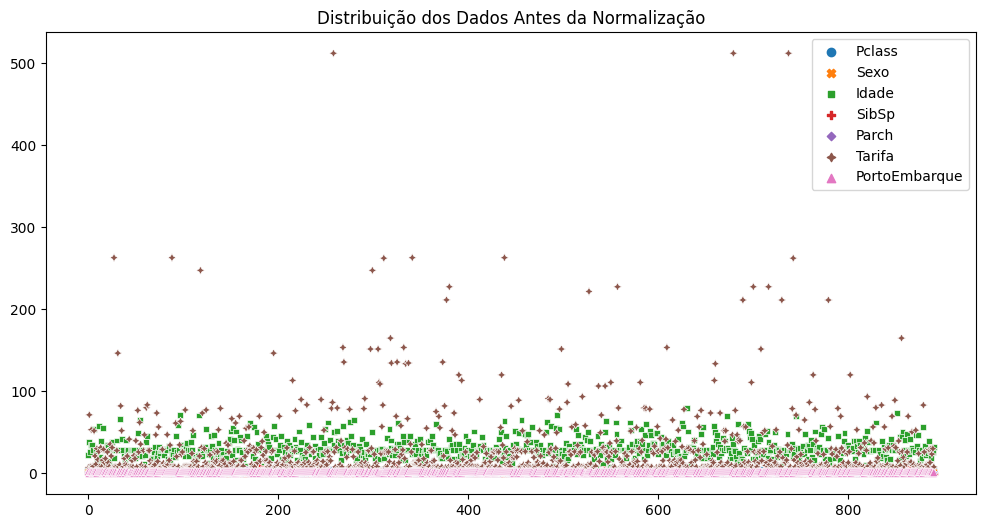

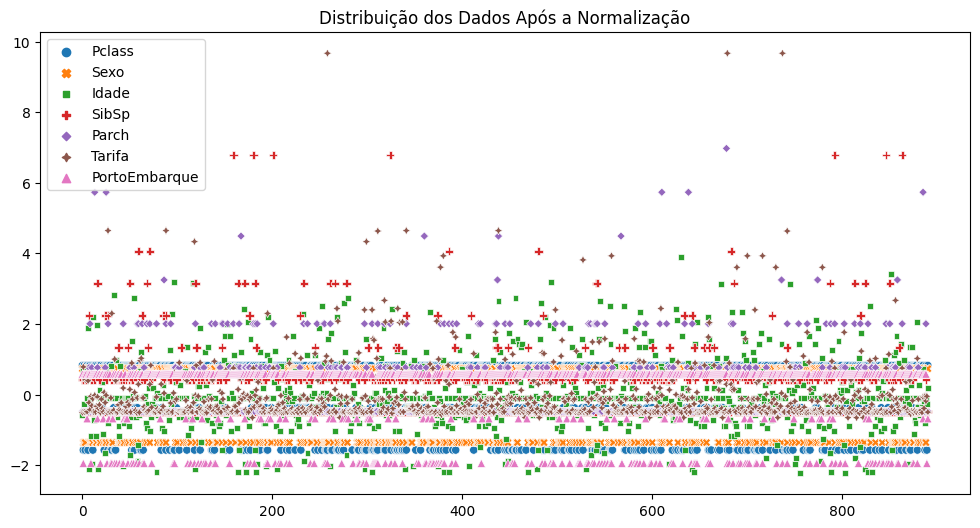

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-8-f66fd42b3fca>:62: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = train_data.groupby('Cluster').mean()


         PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Cluster                                                                   
0         472.078704  0.620370  1.060185  40.148936  0.388889  0.277778   
1         425.764286  0.492857  2.571429  15.819106  1.964286  1.778571   
2         440.766355  0.259813  2.743925  29.060596  0.200000  0.057944   

              Fare      Idade  PortoEmbarque     Tarifa      Sexo  
Cluster                                                            
0        77.854186  38.574074       1.162037  77.854186  0.560185  
1        38.607112  17.298214       1.735714  38.607112  0.357143  
2        12.098036  28.798916       1.635514  12.098036  0.758879  


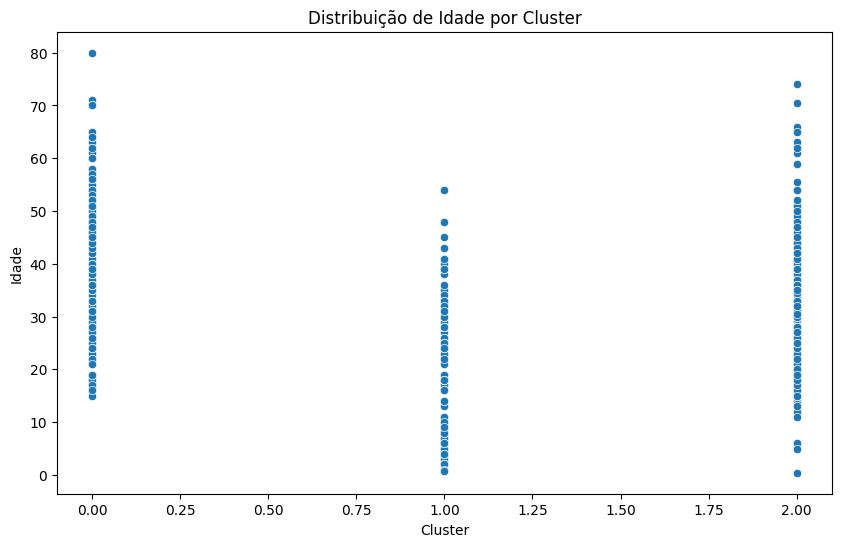

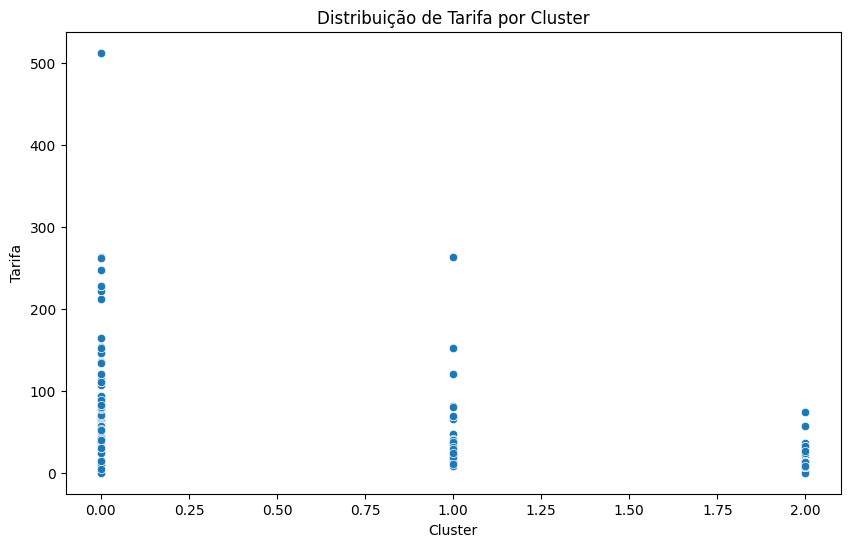

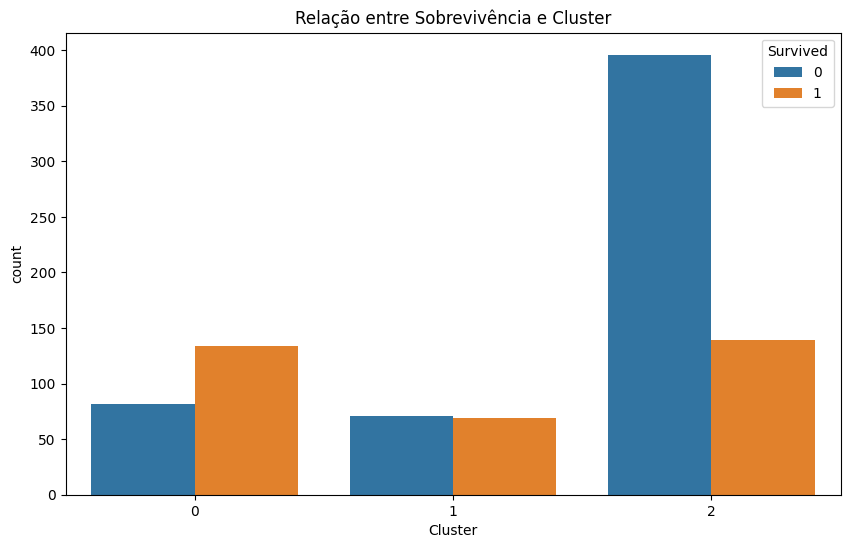

In [8]:


# Carregando os dados
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/baseTitanic/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/baseTitanic/test.csv')


# Função para limpar e preparar os dados
def prepare_data(data):
    # Preenchendo valores ausentes
    data['Idade'] = data['Age'].fillna(data['Age'].median())
    data['PortoEmbarque'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    data['Tarifa'] = data['Fare'].fillna(data['Fare'].median())

    # Convertendo variáveis categóricas
    le = LabelEncoder()
    data['Sexo'] = le.fit_transform(data['Sex'])
    data['PortoEmbarque'] = le.fit_transform(data['PortoEmbarque'])

    # Selecionando colunas relevantes
    cols = ['Pclass', 'Sexo', 'Idade', 'SibSp', 'Parch', 'Tarifa', 'PortoEmbarque']
    return data[cols]

# Preparando os dados de treinamento
train_data_prepared = prepare_data(train_data)

# Exibindo os primeiros registros dos dados preparados
print("Dados Originais:")
print(train_data_prepared.head())

# Normalizando os dados
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_prepared)

# Exibindo os primeiros registros dos dados normalizados
print("\nDados Normalizados:")
print(pd.DataFrame(train_data_scaled, columns=train_data_prepared.columns).head())

# Visualizando dados antes da normalização
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_data_prepared)
plt.title('Distribuição dos Dados Antes da Normalização')
plt.show()

# Normalizando os dados
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_prepared)

# Visualizando dados após a normalização
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pd.DataFrame(train_data_scaled, columns=train_data_prepared.columns))
plt.title('Distribuição dos Dados Após a Normalização')
plt.show()

# Aplicando K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train_data_scaled)
labels = kmeans.labels_

# Adicionando os labels ao dataframe para análise
train_data['Cluster'] = labels

# Análise detalhada dos clusters
cluster_analysis = train_data.groupby('Cluster').mean()

# Visualizando a análise dos clusters
print(cluster_analysis)

# Mais visualizações para entender os clusters
# Distribuição de idade por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cluster', y='Idade', data=train_data)
plt.title('Distribuição de Idade por Cluster')
plt.show()

# Distribuição de tarifa por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cluster', y='Tarifa', data=train_data)
plt.title('Distribuição de Tarifa por Cluster')
plt.show()

# Relação entre sobrevivência e cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Survived', data=train_data)
plt.title('Relação entre Sobrevivência e Cluster')
plt.show()
